In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

In [64]:
os.getcwd()

'C:\\Users\\rahul'

In [3]:
new = pd.read_csv('all_matches.csv', low_memory=False)
new.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,wicket,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,04/18/08,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,NaN,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN
1,335982,2007/08,04/18/08,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,335982,2007/08,04/18/08,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,335982,2007/08,04/18/08,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,335982,2007/08,04/18/08,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [4]:
new.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'runs', 'total', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'wicket', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [5]:
new.describe(include = 'all')

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,wicket,player_dismissed,other_wicket_type,other_player_dismissed
count,1.943540e+05,194354,194354,194354,194354.000000,194354.000000,194354,194354,194354,194354,...,5884.000000,774.000000,511.000000,3118.000000,2.0,9560,194354.000000,9560,0.0,0.0
unique,NaN,14,599,42,NaN,NaN,15,15,540,533,...,NaN,NaN,NaN,NaN,NaN,9,NaN,510,NaN,NaN
top,NaN,2013,10/18/20,Eden Gardens,NaN,NaN,Mumbai Indians,Mumbai Indians,V Kohli,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,caught,NaN,RG Sharma,NaN,NaN
freq,NaN,18177,520,17988,NaN,NaN,24618,24607,4642,4640,...,NaN,NaN,NaN,NaN,NaN,5766,NaN,168,NaN,NaN
mean,7.587790e+05,NaN,NaN,NaN,1.483839,9.532730,NaN,NaN,NaN,NaN,...,1.210401,1.045220,1.831703,1.293137,5.0,NaN,0.049189,NaN,NaN,NaN
std,3.070766e+05,NaN,NaN,NaN,0.503402,5.682251,NaN,NaN,NaN,NaN,...,0.796209,0.372776,1.292153,0.829763,0.0,NaN,0.216262,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,1.000000,0.100000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,5.0,NaN,0.000000,NaN,NaN,NaN
25%,5.012280e+05,NaN,NaN,NaN,1.000000,4.500000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,5.0,NaN,0.000000,NaN,NaN,NaN
50%,7.292990e+05,NaN,NaN,NaN,1.000000,9.400000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,5.0,NaN,0.000000,NaN,NaN,NaN
75%,1.082630e+06,NaN,NaN,NaN,2.000000,14.400000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,4.000000,1.000000,5.0,NaN,0.000000,NaN,NaN,NaN


In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  runs                    194354 non-null  int64  
 14  total               

In [7]:
new.describe(include=np.object)

,season,start_date,venue,batting_team,bowling_team,striker,non_striker,bowler,wicket_type,player_dismissed
count,194354,194354,194354,194354,194354,194354,194354,194354,9560,9560
unique,14,599,42,15,15,540,533,422,9,510
top,2013,10/18/20,Eden Gardens,Mumbai Indians,Mumbai Indians,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma
freq,18177,520,17988,24618,24607,4642,4640,3457,5766,168


In [8]:
print(new.isnull().sum())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
runs                           0
total                          0
wides                     188470
noballs                   193580
byes                      193843
legbyes                   191236
penalty                   194352
wicket_type               184794
wicket                         0
player_dismissed          184794
other_wicket_type         194354
other_player_dismissed    194354
dtype: int64


In [9]:
new['wides'].fillna(0,inplace=True)
new['noballs'].fillna(0,inplace=True)
new['byes'].fillna(0,inplace=True)
new['legbyes'].fillna(0,inplace=True)
new['penalty'].fillna(0,inplace=True)
new['wicket_type'].fillna('None',inplace=True)
print(new.isnull().sum())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
runs                           0
total                          0
wides                          0
noballs                        0
byes                           0
legbyes                        0
penalty                        0
wicket_type                    0
wicket                         0
player_dismissed          184794
other_wicket_type         194354
other_player_dismissed    194354
dtype: int64


In [10]:
new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  runs                    194354 non-null  int64  
 14  total               

In [11]:
#venue,innings,batting_team,bowling_team,batsmen,bowlers
cat_new = new[['venue','batting_team','bowling_team','striker','bowler']]


In [12]:
cat_new.nunique()

venue            42
batting_team     15
bowling_team     15
striker         540
bowler          422
dtype: int64

#### Label Encoding

In [13]:
#venue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test = le.fit(cat_new['venue'])
venue_le = le.fit_transform(cat_new['venue'])
venue_new = le.transform(cat_new['venue'])
new_series_venue = pd.Series(venue_new)

In [14]:
#batting_team
test1 = le.fit(cat_new['batting_team'])
batting_team_le = le.fit_transform(cat_new['batting_team'])
batting_team_new = le.transform(cat_new['batting_team'])
new_series_batting_team = pd.Series(batting_team_new)

In [15]:
#bowling_team
test2 = le.fit(cat_new['bowling_team'])
bowling_team_le = le.fit_transform(cat_new['bowling_team'])
bowling_team_new = le.transform(cat_new['bowling_team'])
new_series_bowling_team = pd.Series(bowling_team_new)

In [16]:
#striker
test3 = le.fit(cat_new['striker'])
striker_le = le.fit_transform(cat_new['striker'])
striker_new = le.transform(cat_new['striker'])
new_series_striker = pd.Series(striker_new)

In [17]:
#bowler
test4 = le.fit(cat_new['bowler'])
bowler_le = le.fit_transform(cat_new['bowler'])
bowler_new = le.transform(cat_new['bowler'])
new_series_bowler = pd.Series(bowler_new)

In [18]:
new_cat_le = pd.concat([new_series_venue,new_series_batting_team,new_series_bowling_team, new_series_striker, new_series_bowler ], axis=1)
new_cat_le.head()

,0,1,2,3,4
0,15,7,13,434,266
1,15,7,13,77,266
2,15,7,13,77,266
3,15,7,13,77,266
4,15,7,13,77,266


In [19]:
new_series_batting_team

0          7
1          7
2          7
3          7
4          7
          ..
194349    14
194350    14
194351    14
194352    14
194353    14
Length: 194354, dtype: int32

In [20]:
tyt = new['batting_team']
x_df = pd.concat([tyt,new_series_batting_team],axis=1)
ddhd = x_df.drop_duplicates()
ddhd

,batting_team,0
0,Kolkata Knight Riders,7
124,Royal Challengers Bangalore,13
225,Chennai Super Kings,0
349,Kings XI Punjab,5
473,Rajasthan Royals,10
595,Delhi Daredevils,3
692,Deccan Chargers,1
932,Mumbai Indians,8
42074,Kochi Tuskers Kerala,6
42444,Pune Warriors,9


In [21]:
col_names = ['new_Venue','new_batting_team','new_bowling_team','new_striker', 'new_bowler']
new_cat_le.columns = col_names

In [22]:
new_cat_le.head()

,new_Venue,new_batting_team,new_bowling_team,new_striker,new_bowler
0,15,7,13,434,266
1,15,7,13,77,266
2,15,7,13,77,266
3,15,7,13,77,266
4,15,7,13,77,266


#### One Hot Encoding

In [23]:

#cat_new_final = pd.get_dummies(cat_new[['batting_team','bowling_team']])
#cat_new_final.info()

### numerical columns

In [24]:
final_df = new.drop(['venue','batting_team','bowling_team','striker','non_striker','bowler','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed','match_id','season','start_date'], axis= 1)
print(final_df.columns)

Index(['innings', 'ball', 'runs_off_bat', 'extras', 'runs', 'total', 'wides',
       'noballs', 'byes', 'legbyes', 'penalty', 'wicket'],
      dtype='object')


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   innings       194354 non-null  int64  
 1   ball          194354 non-null  float64
 2   runs_off_bat  194354 non-null  int64  
 3   extras        194354 non-null  int64  
 4   runs          194354 non-null  int64  
 5   total         194354 non-null  int64  
 6   wides         194354 non-null  float64
 7   noballs       194354 non-null  float64
 8   byes          194354 non-null  float64
 9   legbyes       194354 non-null  float64
 10  penalty       194354 non-null  float64
 11  wicket        194354 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 17.8 MB


<AxesSubplot:>

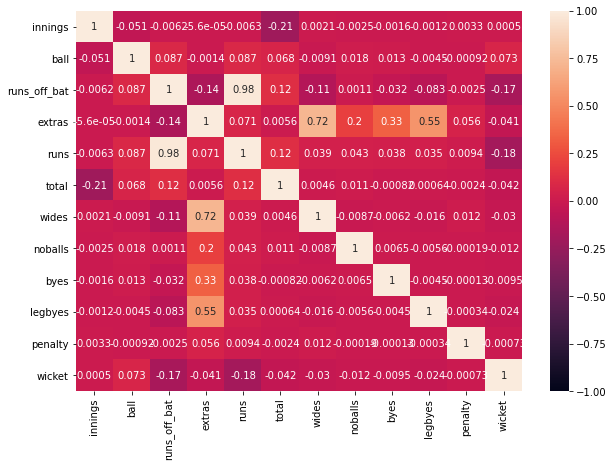

In [26]:
cor = final_df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(cor, vmax =1.0, vmin = -1.0, annot = True, annot_kws={"size": 10})


In [27]:
#final_df['Score']=final_df['runs_off_bat']+final_df['extras']


In [28]:
final_df = final_df.drop(['runs_off_bat','extras','wides','noballs','byes','legbyes','penalty'],axis=1)

### Concat numerical-categorical columns

In [29]:
final_df.columns

Index(['innings', 'ball', 'runs', 'total', 'wicket'], dtype='object')

In [30]:
new_cat_le.columns

Index(['new_Venue', 'new_batting_team', 'new_bowling_team', 'new_striker',
       'new_bowler'],
      dtype='object')

In [31]:
final_df.shape


(194354, 5)

In [32]:
new_cat_le.shape

(194354, 5)

## Final Dataset

In [33]:
cric_df = pd.concat([new_cat_le , final_df], axis=1)
cric_df.columns

Index(['new_Venue', 'new_batting_team', 'new_bowling_team', 'new_striker',
       'new_bowler', 'innings', 'ball', 'runs', 'total', 'wicket'],
      dtype='object')

In [34]:
cric_df.sample(5)

,new_Venue,new_batting_team,new_bowling_team,new_striker,new_bowler,innings,ball,runs,total,wicket
177239,0,10,2,367,38,1,14.4,1,115,0
96353,35,0,3,265,249,1,19.5,2,177,0
86338,37,0,9,441,291,1,10.4,0,164,0
66785,8,7,13,200,132,1,13.1,1,190,0
103512,15,3,13,238,420,2,8.6,0,170,0


In [35]:
cric_df.shape

(194354, 10)

In [36]:
X = cric_df.drop('total',axis =1 )
Y = cric_df['total']
X_train , X_test , Y_train , Y_test = sklearn.model_selection.train_test_split(X , Y ,train_size=0.75, random_state = 29)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [38]:
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
import pickle


In [40]:
dt=DecisionTreeRegressor()
dt.fit(X_train , Y_train)

DecisionTreeRegressor()

In [41]:
filename = 'finalized_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [42]:
Y_pred_dt= dt.predict(X_test)

In [43]:
R_squared = r2_score(Y_test,Y_pred_dt)
R_squared*100

82.50849231786204

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [45]:
#Train the model using the training sets
rf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [46]:
R_squared = r2_score(Y_test,y_pred)
R_squared*100

90.20438354593401

In [47]:
y_pred

array([138.47, 149.85, 177.57, ..., 151.4 , 187.72, 152.18])

In [48]:
x = (y_pred / 20) * 6

In [49]:
pred_total = pd.Series(x)

In [50]:
pred_total

0        41.541
1        44.955
2        53.271
3        55.872
4        43.449
          ...  
48584    49.500
48585    54.084
48586    45.420
48587    56.316
48588    45.654
Length: 48589, dtype: float64

In [51]:
team = X_test['new_batting_team']
team.reset_index(drop=True,inplace= True)
team

0         0
1         1
2        14
3        14
4        10
         ..
48584    10
48585     8
48586     8
48587     5
48588     5
Name: new_batting_team, Length: 48589, dtype: int32

In [52]:
pred_df = pd.concat([pred_total,team],axis=1)

In [53]:
pred_df

,0,new_batting_team
0,41.541,0
1,44.955,1
2,53.271,14
3,55.872,14
4,43.449,10
...,...,...
48584,49.500,10
48585,54.084,8
48586,45.420,8
48587,56.316,5


In [54]:
ddhd

,batting_team,0
0,Kolkata Knight Riders,7
124,Royal Challengers Bangalore,13
225,Chennai Super Kings,0
349,Kings XI Punjab,5
473,Rajasthan Royals,10
595,Delhi Daredevils,3
692,Deccan Chargers,1
932,Mumbai Indians,8
42074,Kochi Tuskers Kerala,6
42444,Pune Warriors,9


In [55]:
team1 = pred_df[pred_df['new_batting_team'] == 5]
team1.to_csv('team1.csv',index=False)
team1.shape
#48

(5510, 2)

In [56]:
team2 = pred_df[pred_df['new_batting_team'] == 7]
team2.to_csv('team2.csv',index=False)
team2.shape
#47

(5752, 2)

In [57]:
### Custom definitions and classes if any ###

def predictRuns(testInput):
    prediction = 0
    ### Your Code Here ###
    return prediction

In [58]:
gg=pd.read_csv('inputFile.csv')

In [59]:
gg.head()

,venue,innings,batting_team,bowling_team,batsmen,bowlers
0,MA Chidambaram Stadium,1,Mumbai Indians,Kolkata Knight Riders,"Quinton de Kock, Rohit Sharma, Suryakumar Yadav","Harbhajan Singh, Varun Chakravarthy, Shakib Al..."


In [60]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8250849231786204


In [61]:
X_test

,new_Venue,new_batting_team,new_bowling_team,new_striker,new_bowler,innings,ball,runs,wicket
104618,13,0,13,441,419,1,9.5,0,0
9396,29,1,8,256,89,2,6.3,1,0
194267,19,14,7,292,375,2,6.3,6,0
144064,26,14,5,239,138,1,18.3,4,0
21316,4,10,0,533,339,1,13.6,6,0
...,...,...,...,...,...,...,...,...,...
113138,30,10,8,42,146,2,10.4,2,0
167031,40,8,7,428,199,1,6.4,6,0
132220,15,8,13,193,404,2,15.4,1,0
156042,40,5,8,96,159,1,1.3,1,0
